<a href="https://colab.research.google.com/github/Ruchiiika/dataScience/blob/main/fifth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.preprocessing import StandardScaler

In [10]:
df=pd.read_csv("https://raw.githubusercontent.com/sakshi2k/Social_Network_Ads/refs/heads/master/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [11]:
df.shape

(400, 5)

In [12]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [30]:
x=df[['Age','EstimatedSalary']].values
y=df['Purchased'].values



In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
scaler= StandardScaler()

In [27]:
x_train= scaler.fit_transform(x_train)

In [29]:
x_test=scaler.transform(x_test)

In [31]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred=model.predict(x_test)

In [33]:
y_pred[:5]

array([0, 1, 0, 1, 0])

In [34]:
x_test[:5]

array([[ 0.79753468, -1.40447546],
       [ 2.07309956,  0.51542886],
       [-0.96863208, -0.76450736],
       [ 0.99377543,  0.74814454],
       [-0.87051171, -1.22993871]])

In [36]:
y_test[:5]

array([0, 1, 0, 1, 0])

In [37]:
cm= confusion_matrix(y_test,y_pred)

In [38]:
cm

array([[50,  2],
       [ 9, 19]])

In [40]:
tn,fp,fn,tp=cm.ravel()

In [45]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8625

In [46]:
recall=recall_score(y_test,y_pred)
recall

0.6785714285714286

In [47]:
error_rate=1-accuracy
error_rate

0.13749999999999996

In [48]:
precision=precision_score(y_test,y_pred)
precision

0.9047619047619048

In [49]:
print("TP",tp)
print("FN",fn)
print("FP",fp)
print("TN",tn)

TP 19
FN 9
FP 2
TN 50


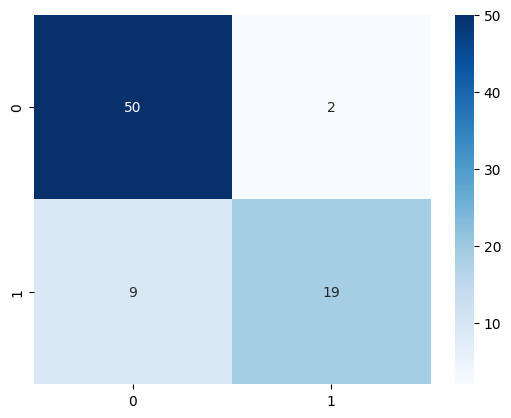

In [50]:
sns.heatmap(cm,annot=True,cmap="Blues")
plt.show()